In [32]:
from nanugpt import utils

In [33]:
#log_filepath = r"$OUT_DIR/grokking/seed_search_loader_gen.txt"
log_filepath = r"$OUT_DIR/grokking/loader_seed_Search.txt"

In [34]:
with open(utils.full_path(log_filepath), 'r') as f:
    lines = f.readlines()

logs = []
for line in lines:
    if 'seed=' not in line:
        continue    
    columns = line.split('[INFO] ')[1].split(',')
    log = {}
    for column in columns:
        if '=' in column:
            key, val = tuple(column.split('='))
            val = val.strip()
            if val.isnumeric():
                val = int(val)
            else:
                try:
                    val = float(val)
                except ValueError:
                    pass
            log[key.strip()] = val
    logs.append(log)
    
print('Number of logs: {}'.format(len(logs)))
print('Example log: {}'.format(logs[0]))

Number of logs: 3180
Example log: {'seed': 42, 'data_loader_seed': 0, 'train/step': 2999, 'val/acc': 0.01289, 'val/loss': 11.91, 'train/acc': 0.9785, 'train/loss': 0.1384, 'w_norm': 65.27, 'lr': 0.001}


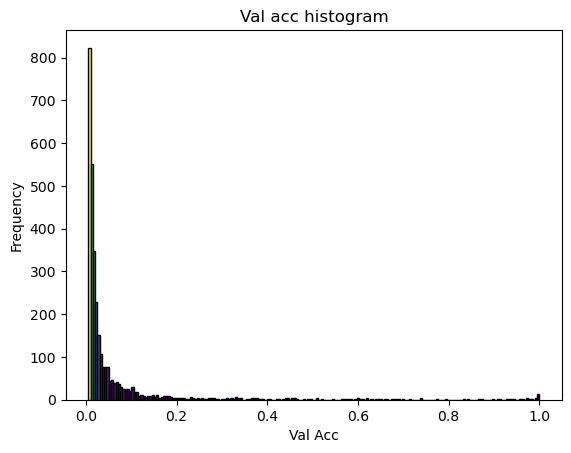

In [35]:
utils.draw_histogram([log['val/acc'] for log in logs if log['val/acc'] <= 1], 'Val Acc', 'Frequency', 'Val acc histogram')

In [36]:
good_seeds = [log['data_loader_seed'] for log in logs if log['val/acc'] > 0.98]
print([bin(g) for g in good_seeds])
print('Number of good seeds: {}'.format(len(good_seeds)))
print('% of good seeds: {}%'.format(len(good_seeds) * 100.0 / len(logs)))

['0b1000', '0b11011100', '0b100010011', '0b100111011', '0b1000110011', '0b1100011001', '0b1111101000', '0b10000000010', '0b10011110101', '0b10101111010', '0b100011000000', '0b100011111101', '0b100100100110', '0b100110110000', '0b101000000101', '0b101101010000', '0b101110101011', '0b101111101101', '0b101111110111']
Number of good seeds: 19
% of good seeds: 0.5974842767295597%


In [37]:
normal_seeds = [log['data_loader_seed'] for log in logs if log['val/acc'] < 0.25]
print('Number of normal seeds: {}'.format(len(normal_seeds)))
print('% of normal_seeds seeds: {}%'.format(len(normal_seeds) * 100.0 / len(logs)))

Number of normal seeds: 3000
% of normal_seeds seeds: 94.33962264150944%
